In [1]:
!pip install graphviz

In [31]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
import multiprocessing

from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text, plot_tree

from sklearn import metrics
import graphviz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 결정 트리(Decision Tree)

* 분류와 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측
* **if-then-else** 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을 수록 복잡한 모델
* 결정 트리 장점
  * 이해와 해석이 쉽다
  * 시각화가 용이하다
  * 많은 데이터 전처리가 필요하지 않다
  * 수치형과 범주형 데이터 모두를 다룰 수 있다

### 지니계수를 이용하여 데이터를 분할
- 지니계수 : 경제학에서 불평등지수를 나타낼 때 사용하는 것으로 0일 때 완전 평등, 1일 때 완전 불평등을 의미
- 머신러닝에서는 데이터가 다양한 값을 가질수록 평등하며 특정 값으로 쏠릴 때 불평등한 값이 됩니다.
- 다양성이 낮을수록 균일도가 높다는 의미로 1로 갈수록 균일도가 높아 지니계수가 높은 속성을 기준으로 분할

### Decision Tree Classifier의 파라미터

#### 핵심 파라미터

##### min_samples_split	: 노드를 분할하기 위한 최소한의 샘플 데이터수 
( 과적합을 제어하는데 사용 )
- Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가<br>
##### min_samples_leaf: 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
- min_samples_split과 함께 과적합 제어 용도<br>
- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요<br>
##### max_features: 최적의 분할을 위해 고려할 최대 feature 개수<
- Default = None → 데이터 세트의 모든 피처를 사용<br>
- int형으로 지정 →피처 갯수 / float형으로 지정 →비중<br>
- sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정<br>
- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정<br>
##### max_depth	: 트리의 최대 깊이<br>
- default = None<br>
→ 완벽하게 클래스 값이 결정될 때 까지 분할<br>
또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할<br>
- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요<br>
##### max_leaf_nodes:	리프노드의 최대 개수<br>

In [3]:
iris = load_iris()

In [4]:
iris_df = pd.DataFrame( iris.data)
iris_df.columns = iris['feature_names']
iris_df['specis'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specis
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
x_data = iris['data']
y_data = iris['target']

In [6]:
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2,
                                                   stratify=y_data, random_state=1)

In [7]:
model_tree = DecisionTreeClassifier(criterion="entropy")
model_tree.fit( x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [8]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/

In [10]:
import os
os.environ['PATH']+= os.pathsep+r'C:\Program Files\graphviz-2.44.1-win32\Graphviz\bin'

In [11]:
export_graphviz( model_tree, out_file='tree.dot', 
                class_names=iris['target_names'], feature_names=iris['feature_names'] )

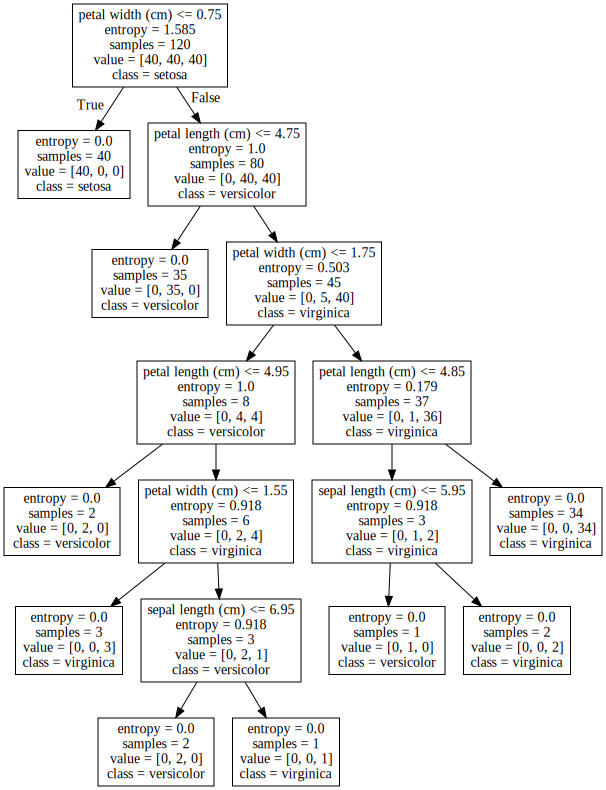

In [12]:
fp = open('tree.dot')
dot_graph = fp.read()
graphviz.Source( dot_graph)

In [13]:
model_tree.score( x_train, y_train)

1.0

In [14]:
model_tree.score( x_test, y_test)

0.9666666666666667

In [15]:
model_tree.feature_importances_

array([0.02896901, 0.        , 0.33502994, 0.63600105])

In [16]:
import seaborn as sns

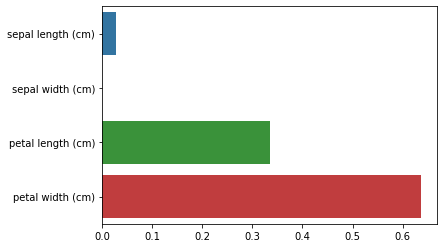

In [17]:
sns.barplot( x=model_tree.feature_importances_, y=iris['feature_names'])
plt.show()

# 과적합확인

In [18]:
from sklearn.model_selection import validation_curve

In [19]:
pip_tree = make_pipeline( DecisionTreeClassifier(criterion='entropy') )

In [20]:
param_range = [2,3,4,5,6,7,8,9,10] # range( 2,11)

In [22]:
train_score, test_score = validation_curve( estimator=pip_tree, X=x_train, y=y_train, 
                    param_name='decisiontreeclassifier__max_depth',
                param_range=param_range, scoring='f1_macro', cv =5, verbose=1 )

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.0s finished


In [29]:
train_score

array([[0.96868118, 0.95816993, 0.9582926 , 0.96868118, 0.96874237],
       [0.96868118, 0.95816993, 0.96874237, 0.9791463 , 0.9791463 ],
       [0.98958079, 0.97916667, 0.98958079, 1.        , 0.98958079],
       [1.        , 0.98958079, 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

In [30]:
test_score

array([[0.91534392, 0.95816993, 0.95816993, 0.91666667, 0.91666667],
       [0.8745098 , 0.95816993, 0.95816993, 0.95816993, 0.95816993],
       [0.91666667, 0.95816993, 1.        , 0.91666667, 0.95816993],
       [0.91666667, 0.95816993, 1.        , 0.91666667, 0.95816993],
       [0.91666667, 0.95816993, 0.95816993, 0.91666667, 0.95816993],
       [0.91666667, 0.95816993, 0.95816993, 0.91666667, 0.95816993],
       [0.91666667, 0.95816993, 0.95816993, 0.91666667, 0.95816993],
       [0.91666667, 0.95816993, 0.95816993, 0.91666667, 0.95816993],
       [0.91666667, 0.95816993, 1.        , 0.91666667, 0.95816993]])

In [24]:
train_score.mean(axis=1)

array([0.96451346, 0.97077722, 0.98958181, 0.99791616, 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [26]:
test_score.mean( axis=1)

array([0.93300342, 0.94143791, 0.94993464, 0.94993464, 0.94156863,
       0.94156863, 0.94156863, 0.94156863, 0.94993464])

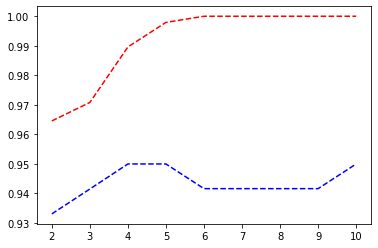

In [28]:
plt.plot( param_range, train_score.mean( axis=1), 'r--')
plt.plot( param_range, test_score.mean( axis=1), 'b--')
plt.show()

$$
\begin{align}
H[Y] = -\sum_{k=1}^K p(y_k) \log_2 p(y_k)
\tag{1}
\end{align}
$$

한 영역 안에 존재하는 데이터 가운데 
범주 i에 속하는 데이터의 비율

In [ ]:
DecisionTreeClassifier(random_state=0)

In [32]:
cancer = load_breast_cancer()

In [33]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [34]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [36]:
print( cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
# breat_cancer decisiontree validation curve 를 그리시요..
35분에 5조 제출해주시면 됩니다.

In [37]:
cancer = load_breast_cancer()
x_data = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
y_data = pd.DataFrame(cancer['target'], columns = ['target'])
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2,
                                    stratify = y_data, random_state = 1)

In [38]:
x_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [39]:
y_data

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [40]:
model_tree = DecisionTreeClassifier(criterion = 'entropy')
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [41]:
import os
os.environ['PATH']+= os.pathsep+r'C:\Program Files\graphviz-2.44.1-win32\Graphviz\bin'

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.5s finished


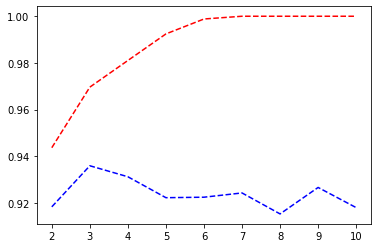

In [42]:
pipe_tree = make_pipeline( StandardScaler(),
                DecisionTreeClassifier(criterion = 'entropy'))
param_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]

train_score, test_score = validation_curve(estimator = pipe_tree, X = x_train, y = y_train, param_name = 'decisiontreeclassifier__max_depth', 
                                            param_range = param_range, scoring = 'f1_macro', cv = 5, verbose = 1)

plt.plot(param_range, train_score.mean(axis = 1), 'r--')                                  
plt.plot(param_range, test_score.mean(axis = 1), 'b--')
plt.show()